In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

### Упражнение 1

* Реализуйте функцию `plot_horizontal_bar`, рисующую горизонтальные bar'ы

In [3]:
def plot_horizontal_bar(bars_length, labels, yticks_labels, figsize):
  plt.subplots(figsize = figsize)
  plt.barh(np.arange(len(bars_length)), bars_length, 0.8, color='#a3cdf1')
  plt.xticks(np.arange(-10, 10, step=2.5), fontsize=30)
  plt.yticks(np.arange(len(bars_length)), yticks_labels, fontsize=30)
  text = []
  for i in range(len(bars_length)):
    if bars_length[i] > 0:
      text.append(bars_length[i])
    else:
      text.append(0)
    plt.annotate(labels[i], (text[i],i), size=30)
  plt.grid()
  plt.show()

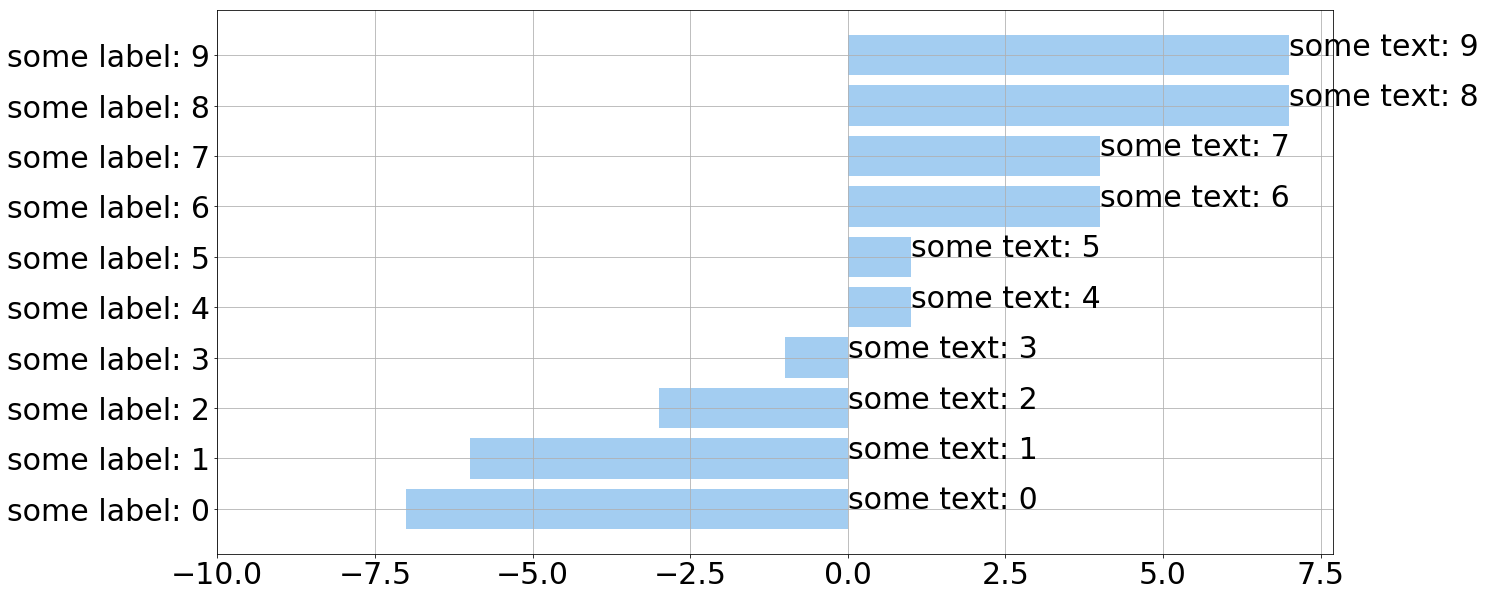

In [4]:
bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()

yticks_labels = ['some label: {}'.format(i) for i in range(10)]
labels = ['some text: {}'.format(i) for i in range(10)]
figsize = (20, 10)

plot_horizontal_bar(bars_length, labels, yticks_labels, figsize)

### Упражнение 2

* Реализуйте функцию `plot_time_probabilities`, рисующую изменяющиеся во времени вероятности неких событий.
* Cобытия для нас имеют тональность (от плохого к хорошему). Отразите ее на графике с помощью градиента по цвету.

In [5]:
def plot_time_probabilities(probabilities_in_time, figsize):
  plt.figure(figsize=figsize)
  colors = plt.cm.coolwarm(np.linspace(0,1,10))
  plt.stackplot(probabilities_in_time.index, probabilities_in_time.values.T,
                colors=colors)
  plt.xticks(fontsize=14)
  plt.yticks(fontsize=14)
  plt.grid(axis='x')
  plt.legend(['Probability: {}'.format(i) for i in range(10)], loc='lower left',
             fontsize=14)
  plt.show()

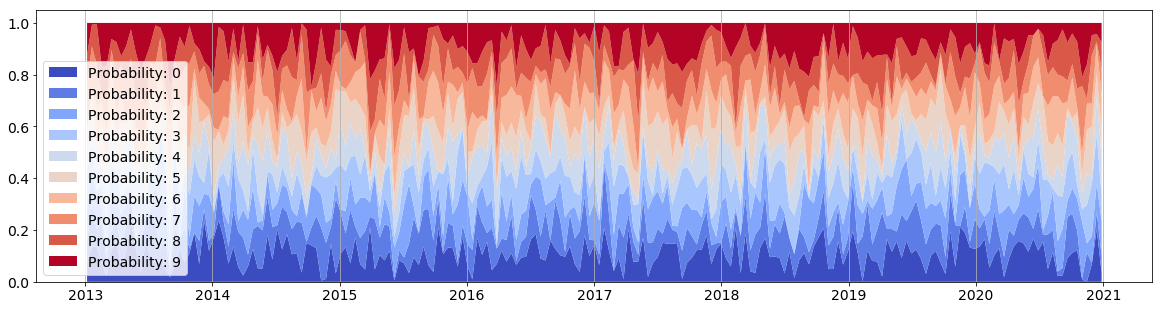

In [8]:
dti = pd.date_range('2013-01-01', '2020-12-31', freq='2W')
probabilities_in_time = np.random.random((10, len(dti)))
probabilities_in_time = probabilities_in_time / probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti
figsize = (20, 5)

plot_time_probabilities(probabilities_in_time, figsize)

### Упражнение 3
 
* Реализуйте функцию `plot_intraday_ts`, рисующую тепловую карту по временному ряду с внутридневными данными

In [9]:
def plot_intraday_ts(intraday_ts, figsize):
    plt.figure(figsize=figsize)
    intraday = np.array(intraday_ts)[:-1].reshape(int((3625-1)/24),24).T
    ax = plt.gca()
    cs = plt.pcolor(intraday, cmap='RdBu',edgecolors='white', linewidths=2)
    plt.colorbar(cs, ax=[ax], location='left')
    plt.xticks(np.arange((3625-1)/24)[::2],
               pd.date_range('2020-02-01', '2020-07-01',
                             freq='D')[:-1][::2].strftime('%B %d'),
               rotation=45)                                                       
    plt.yticks(np.arange(1,24,2),
               [str(i).rjust(2,'0') + ':00' for i in np.arange(1,24,2)])
    ax.yaxis.set_ticks_position('right')
    plt.grid(color='w')
    plt.ylabel('Время', fontsize=20)
    plt.xlabel('Дата', fontsize=20)
    plt.show()

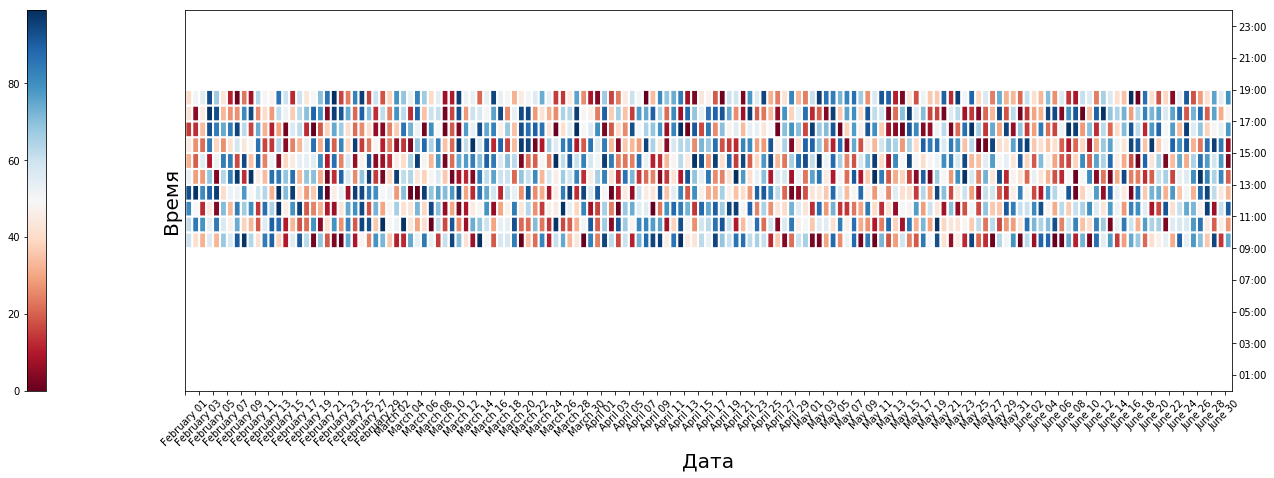

In [10]:
intraday_ts = pd.Series(np.random.randint(0, 100, 3625), 
                        index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday_ts.loc[(intraday_ts.index.hour < 9) | (intraday_ts.index.hour > 18)] = np.nan
figsize = (25, 7)


plot_intraday_ts(intraday_ts, figsize)